In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import utils.satellite_util as ut
from machine_learning.logistic_regression_utils import extract_uganda_features, load_satellite_labels, load_satellite_labels_test,extract_uganda_features_test

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('data/assorted_images/satellite_images.h5','r')
print('Keys: %s' % f.keys())
a_group_key = list(f.keys())[0]
print(f['data'].shape)
labels = load_satellite_labels()
feats = extract_uganda_features()
# coordinates = ut.get_coordinate_list()
# for i in range(len(coordinates)):
#     lat = coordinates[i][0]
#     long = coordinates[i][1]
#     print(coordinates[i])
#     ut.download_img(lat, long, save = True)
#     print(coordinates[i])
print(labels.shape)
print(feats.shape)

Keys: KeysView(<HDF5 file "satellite_images.h5" (mode r)>)
(641, 224, 224, 3)
(512, 1)
(512, 4097)


In [3]:
data_original = feats
print(data_original)

[[-0.06610069 -0.41688842 -0.76441842 ... -0.07841842 -0.16516323
   1.        ]
 [-0.37770528 -0.45516455 -0.94728887 ... -0.46145886  0.27882439
   1.        ]
 [-0.19659235 -0.68315154 -0.97933584 ... -0.57199091 -0.63358438
   1.        ]
 ...
 [-0.13309051 -0.52073354 -0.91500926 ... -0.50650895  0.01166872
   1.        ]
 [ 0.24722964  0.46375093  0.55015087 ...  0.74363279  0.43401939
   1.        ]
 [ 0.02441366 -0.02421933 -0.59874928 ...  0.02735071  1.36326408
   1.        ]]


In [4]:
# train_ratio, val_ratio = 0.9, 0.05
# X_train = data_original[:int(data_original.shape[0]*train_ratio), ...] # ... means all the other axes
# y_train = labels[:int(data_original.shape[0]*train_ratio), ...]

# X_val = data_original[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]
# y_val = labels[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]

# X_test = data_original[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]
# y_test = labels[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]

val_labels = load_satellite_labels_test()
val_ex = extract_uganda_features_test()
#print(val_labels[490:])
print(val_labels.shape)
print(val_ex.shape)

(129, 1)
(129, 4097)


In [5]:
#train_data = data_original[:int(len(data_original)*0.9)]
#train_labels = labels[:int(len(data_original)*0.9)]
#val_data = data_original[int(len(data_original)*0.9):]

In [6]:
import keras
from keras.models import Sequential # Sequential is one of the main models in Keras, which is basically a sequentially stacked series of layers

model = Sequential() # Initialize a Sequential model instance

Using TensorFlow backend.


In [7]:
# this helps to balance the data imbalance
class_weight = {0:1.,
               1:3.}
from keras.layers import Dense
#model.add(Dense(units=512, activation='relu', input_dim=4097)) 
model.add(Dense(units=64, activation='relu', input_dim=4097))
model.add(keras.layers.Dropout(0.5, noise_shape=None, seed=None))
#model.add()
#model.add(Dense(units=64,activation='sigmoid',input_dim=224*224*3))
# model.add(Dense(units=64,activation='relu',input_dim=512))
#keras.layers.Dropout(0.7, noise_shape=None, seed=None)
#model.add(Dense(units=32,activation='sigmoid',input_dim=224*224*3))
#model.add(Dense(units=32,activation='relu',input_dim=512))
#model.add(keras.layers.Dropout(0.5, noise_shape=None, seed=None))
#model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid',input_dim = 64))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.001))

In [10]:
# X_train_flat = X_train.reshape((-1, 224*224*3)) # -1 means letting NumPy to figure this axis out automatically
# X_val_flat = X_val.reshape((-1, 224*224*3))
# X_test_flat = X_test.reshape((-1, 224*224*3))

# print(X_train_flat.shape)
# print(X_val_flat.shape)
# print(X_test_flat.shape)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=50)
# Then use fit() to actually train our model
# epochs is basically how many iterations we want for the update process. The model needs some time to reach the optimal state!
# batch_size is how many images we use each time to estimate the gradient. Remember that the more we use the more accurate each update will be, but it will also be slower
#print(labels)
from collections import Counter
training_data = data_original[:490]
print(val_ex.shape,data_original.shape, val_labels.shape, labels.shape)
combined_val_data = np.append(val_ex, data_original[490:], axis=0)
combined_val_labels = np.append(val_labels, labels[490:], axis=0)
print(combined_val_data.shape)
print(combined_val_labels.shape)


print(Counter(val_labels.squeeze()))
print(Counter(labels[:490].squeeze()))
print(np.mean(val_ex),np.mean(data_original))

#model.fit(data_original, labels, validation_data=(val_labels,val_ex),epochs=400, batch_size=3128, shuffle=True,class_weight=class_weight)
history = model.fit(training_data, labels[:490], validation_data=(combined_val_data, combined_val_labels), epochs=70, batch_size=100, shuffle=True,class_weight=class_weight,callbacks=[early_stopping])


(129, 4097) (512, 4097) (129, 1) (512, 1)
(151, 4097)
(151, 1)
Counter({0: 105, 1: 24})
Counter({0: 385, 1: 105})
0.012008543801007231 -0.0027200000403731126
Train on 490 samples, validate on 151 samples
Epoch 1/70
490/490 [==============================] - 1s 1ms/step - loss: 1.4689 - acc: 0.5204 - val_loss: 0.6024 - val_acc: 0.7152
Epoch 2/70
490/490 [==============================] - 0s 159us/step - loss: 1.3422 - acc: 0.6469 - val_loss: 0.6994 - val_acc: 0.5762
Epoch 3/70
490/490 [==============================] - 0s 159us/step - loss: 1.0857 - acc: 0.5959 - val_loss: 0.6235 - val_acc: 0.6755
Epoch 4/70
490/490 [==============================] - 0s 128us/step - loss: 1.1833 - acc: 0.7184 - val_loss: 0.5769 - val_acc: 0.7351
Epoch 5/70
490/490 [==============================] - 0s 128us/step - loss: 1.0403 - acc: 0.6653 - val_loss: 0.5861 - val_acc: 0.6490
Epoch 6/70
490/490 [==============================] - 0s 159us/step - loss: 1.0649 - acc: 0.6571 - val_loss: 0.5640 - val_acc: 0

490/490 [==============================] - 0s 128us/step - loss: 0.4556 - acc: 0.8673 - val_loss: 0.6016 - val_acc: 0.7152
Epoch 61/70
490/490 [==============================] - 0s 96us/step - loss: 0.4769 - acc: 0.8816 - val_loss: 0.5716 - val_acc: 0.7351
Epoch 62/70
490/490 [==============================] - 0s 96us/step - loss: 0.4437 - acc: 0.8837 - val_loss: 0.6119 - val_acc: 0.7219
Epoch 63/70
490/490 [==============================] - 0s 96us/step - loss: 0.4541 - acc: 0.8755 - val_loss: 0.6497 - val_acc: 0.7152
Epoch 64/70
490/490 [==============================] - 0s 96us/step - loss: 0.4357 - acc: 0.8857 - val_loss: 0.6013 - val_acc: 0.7285
Epoch 65/70
490/490 [==============================] - 0s 96us/step - loss: 0.4275 - acc: 0.8816 - val_loss: 0.5816 - val_acc: 0.7219
Epoch 66/70
490/490 [==============================] - 0s 128us/step - loss: 0.4367 - acc: 0.9000 - val_loss: 0.5642 - val_acc: 0.7020
Epoch 67/70
490/490 [==============================] - 0s 96us/step - lo

512/512 [==============================] - 0s 153us/step
The train accuracy is:[0.22316198330372572, 0.93359375]
129/129 [==============================] - ETA:  - 0s 121us/step
The val accuracy is: [0.5724993499109551, 0.751937984496124]
[]
The predicted probabilities are: [[2.40319523e-25]
 [8.43326628e-01]
 [1.67994481e-02]
 [2.77387101e-24]
 [1.71352846e-16]
 [2.10926179e-02]
 [9.82633457e-02]
 [3.52977097e-01]
 [9.71660793e-01]
 [5.51652491e-01]
 [8.05347800e-01]
 [2.54760683e-02]
 [1.63592994e-02]
 [1.79616292e-20]
 [9.74373341e-01]
 [7.03561604e-01]
 [3.96963447e-01]
 [4.60850537e-01]
 [8.83333206e-01]
 [3.96197259e-01]
 [2.69834906e-01]
 [2.93036188e-24]
 [1.11163648e-11]
 [3.29717010e-01]
 [4.31543171e-01]
 [7.82515764e-01]
 [1.96346154e-23]
 [1.75840862e-03]
 [6.05869282e-04]
 [4.14074719e-01]
 [3.68583798e-01]
 [1.10237730e-08]
 [2.51357863e-03]
 [9.95046616e-01]
 [4.23967838e-01]
 [1.35357333e-02]
 [2.06072368e-02]
 [9.38735828e-02]
 [1.61145657e-01]
 [2.67408729e-01]
 [7.3

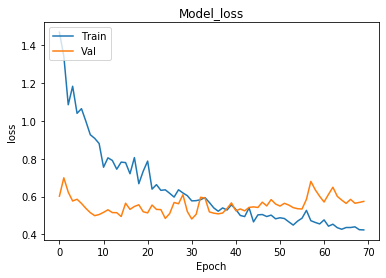

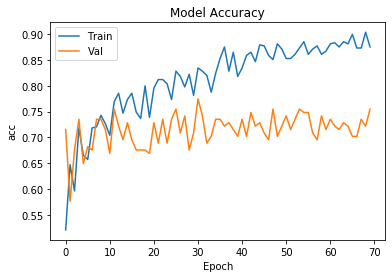

In [11]:
ac = model.evaluate(feats,labels)
print('The train accuracy is:{}'.format(ac))

acc = model.evaluate(val_ex, val_labels)
print('The val accuracy is: {}'.format(acc))

# And make predictions
prob = model.predict(val_ex) # These are probabilities, and we want to convert them to class labels
label = np.array(prob > 0.5, dtype=int)
print(label[490:])
print('The predicted probabilities are: {}'.format(prob))
print('The predicted class labels are: {}'.format(label))

print('The predicted probabilities are: {}'.format(prob))
print('The predicted class labels are: {}'.format(label))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()